In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
#from treeinterpreter import treeinterpreter as ti
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
d = pd.read_csv('data/scores.txt', sep='\t')

In [ ]:
y = d['Class']
y = y.replace(2,1)
x = d.drop(['Accession', 'Class'], axis=1)

In [ ]:
RANDOM_SEED = 123
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
feature_imp = pd.Series(rf.feature_importances_,index=list(x)).sort_values(ascending=False)

In [ ]:
%matplotlib inline
# Creating a bar plot
plt.rcParams['figure.figsize'] = [10, 20]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
instance = d[:1].drop(['Accession', 'Class'], axis=1)

In [ ]:
print(rf.predict_proba(instance))

In [ ]:
prediction, bias, contributions = ti.predict(rf, instance)
print("Prediction", prediction)
print("Bias (trainset prior)", bias)
print("Feature contributions:")
for c, feature in zip(contributions[0], list(x)):
    print(feature, c)

In [ ]:
#6 features
d = pd.read_csv('data/scores.txt', sep='\t')

In [ ]:
RANDOM_SEED = 123
y = d['Class']
y = y.replace(2,1)
x = d[['openen43','CAI','GC','rrf_5S_RNA','iXnos','length']]

In [ ]:
x['iXnos_rate'] = x['iXnos']/x['length']

In [15]:
x = x.drop(['iXnos', 'length'], axis=1)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [17]:
# %%timeit
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
feature_imp = pd.Series(rf.feature_importances_,index=list(x)).sort_values(ascending=False)

Accuracy: 0.8072324292796734


No handles with labels found to put in legend.


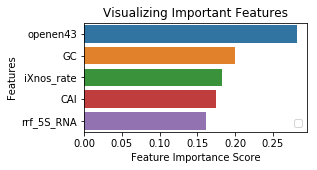

In [18]:
%matplotlib inline
# Creating a bar plot
plt.rcParams['figure.figsize'] = [4, 2]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [19]:
y_pred_rf = rf.predict_proba(x_test)[:, 1]

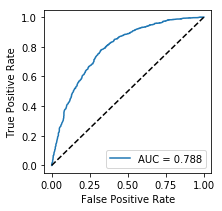

In [20]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [3, 3]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
plt.plot(fpr_rf, tpr_rf, label='AUC = %0.3f' % roc_auc_score(y_test, y_pred_rf))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
instance = x[:1]
prediction, bias, contributions = ti.predict(rf, instance)
print("Prediction", prediction)
print("Bias (trainset prior)", bias)
print("Feature contributions:")
for c, feature in zip(contributions[0], list(x)):
    print(feature, c)

In [9]:
filename = 'rf_6.sav'
pickle.dump(rf, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict_proba(instance)
result = loaded_model.score(x_test, y_test)
print(result)